latency
Train size:  10800 10800
Test size: 1200 1200
depth =  2   MRE:  3.2581324639   R2:  0.480290305351
depth =  3   MRE:  2.24116181835   R2:  0.762312399869
depth =  4   MRE:  1.55511805296   R2:  0.87422504796
depth =  5   MRE:  0.981304927365   R2:  0.93380151696
depth =  6   MRE:  0.601944999647   R2:  0.953314928285
depth =  7   MRE:  0.361491240322   R2:  0.961486172061
depth =  8   MRE:  0.201170713226   R2:  0.958383720161
depth =  9   MRE:  0.12615986449   R2:  0.946174072064
depth =  10   MRE:  0.0905774415601   R2:  0.933414119613
bandwidth
Train size:  10800 10800
Test size: 1200 1200
depth =  2   MRE:  0.673760943423   R2:  0.413903881417
depth =  3   MRE:  0.513875453765   R2:  0.52997644493
depth =  4   MRE:  0.338265035417   R2:  0.717194524335
depth =  5   MRE:  0.244763357602   R2:  0.821248101003
depth =  6   MRE:  0.166552506275   R2:  0.898177868263
depth =  7   MRE:  0.10336735681   R2:  0.949373609105
depth =  8   MRE:  0.068712011494   R2:  0.972483472428
d

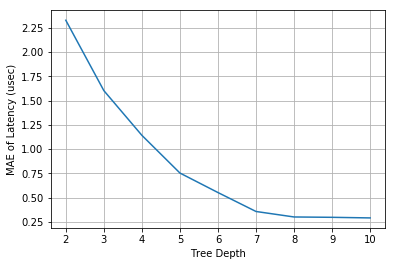

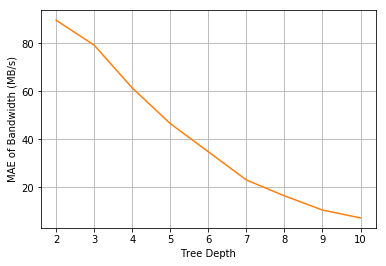

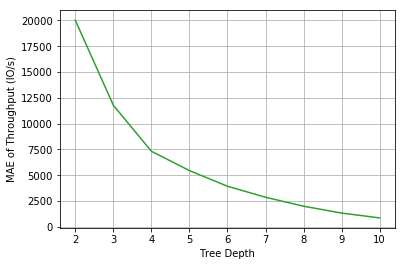

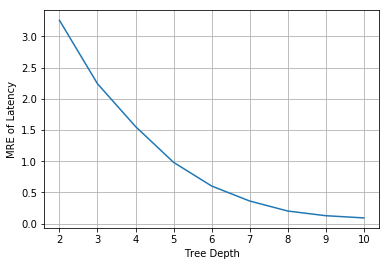

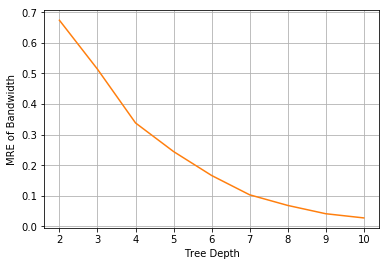

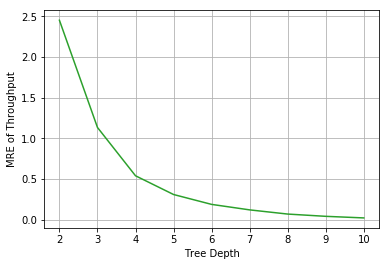

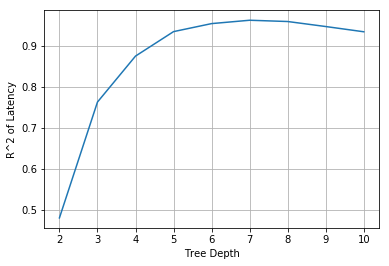

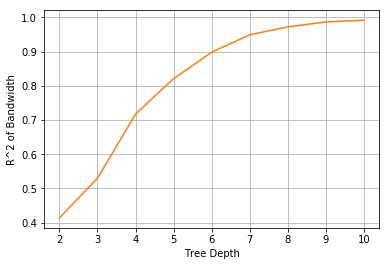

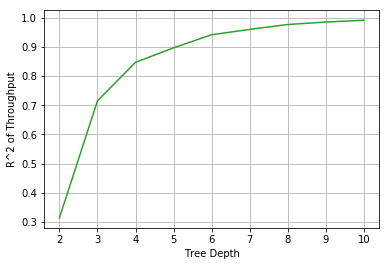

In [1]:
import numpy as np
import pandas as pd
import os
os.chdir('./') # Set working directory
# Import the necessary modules and libraries
from sklearn import tree
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import r2_score

# Create a random dataset

os.chdir('./') # Set working directory

train_data_seq = pd.read_csv("seq_result.csv")    # Read the data
train_data_random = pd.read_csv("random_result.csv")
train_data_stride = pd.read_csv("stride_result.csv")
#print len(train_data_seq)
#print len(train_data_random)
#print len(train_data_stride)

train_data = pd.concat([train_data_seq, train_data_random,train_data_stride])
#print len(train_data)

train_data = shuffle(train_data)

MAE_all = []
MRE_all = []
R2_all = []

for index in range(3, 0, -1):
    if index == 1:
        print "iops"
    elif index == 2:
        print "bandwidth"
    else:
        print "latency"
    X = []
    y = []
    for i in range(len(train_data)*9/10):
        line = train_data[i:i+1].values.tolist()[0]
        X.append(line[:-3])
        y.append(line[-index])

    print "Train size: ", len(X), len(y)
    X_test = []
    y_test = []
    for i in range(len(train_data)*9/10, len(train_data)):
        line = train_data[i:i+1].values.tolist()[0]
        X_test.append(line[:-3])
        y_test.append(line[-index])

    print "Test size:", len(X_test), len(y_test)

    # Fit regression model
    MAE = []
    MRE = []
    R2 = []
    for i in range(2,11):
        regr = DecisionTreeRegressor(max_depth=i)
        regr.fit(X, y)
        # Predict
        y_p = regr.predict(X_test)

        # Plot the results
        mae = np.mean(abs(y_test-y_p))
        MAE.append(mae)
        mre = np.mean(abs(y_test-y_p)/y_test)
        MRE.append(mre)
        r2 = r2_score(y_test, y_p) 
        R2.append(r2)
        print "depth = ",i,"  MRE: ", mre, "  R2: ", r2
    MAE_all.append(MAE)
    MRE_all.append(MRE)
    R2_all.append(R2)

plt.plot([2,3,4,5,6,7,8,9,10],MAE_all[0], color='C0')
plt.ylabel('MAE of Latency (usec)')
plt.xlabel('Tree Depth')
plt.grid(1)
plt.show()

plt.plot([2,3,4,5,6,7,8,9,10],MAE_all[1], color='C1')
plt.ylabel('MAE of Bandwidth (MB/s)')
plt.xlabel('Tree Depth')
plt.grid(1)
plt.show()

plt.plot([2,3,4,5,6,7,8,9,10],MAE_all[2], color='C2')
plt.ylabel('MAE of Throughput (IO/s)')
plt.xlabel('Tree Depth')
plt.grid(1)
plt.show()

plt.plot([2,3,4,5,6,7,8,9,10],MRE_all[0], color='C0')
plt.ylabel('MRE of Latency')
plt.xlabel('Tree Depth')
plt.grid(1)
plt.show()

plt.plot([2,3,4,5,6,7,8,9,10],MRE_all[1], color='C1')
plt.ylabel('MRE of Bandwidth')
plt.xlabel('Tree Depth')
plt.grid(1)
plt.show()

plt.plot([2,3,4,5,6,7,8,9,10],MRE_all[2], color='C2')
plt.ylabel('MRE of Throughput')
plt.xlabel('Tree Depth')
plt.grid(1)
plt.show()

plt.plot([2,3,4,5,6,7,8,9,10],R2_all[0], color='C0')
plt.ylabel('R^2 of Latency')
plt.xlabel('Tree Depth')
plt.grid(1)
plt.show()

plt.plot([2,3,4,5,6,7,8,9,10],R2_all[1], color='C1')
plt.ylabel('R^2 of Bandwidth')
plt.xlabel('Tree Depth')
plt.grid(1)
plt.show()

plt.plot([2,3,4,5,6,7,8,9,10],R2_all[2], color='C2')
plt.ylabel('R^2 of Throughput')
plt.xlabel('Tree Depth')
plt.grid(1)
plt.show()


In [3]:
print MAE_all[0][5], MRE_all[0][5], R2_all[0][5]
print MAE_all[1][5], MRE_all[1][5], R2_all[1][5]
print MAE_all[2][5], MRE_all[2][5], R2_all[2][5]

0.358104618371 0.361491240322 0.961486172061
23.1025067621 0.10336735681 0.949373609105
2862.22597202 0.120447709316 0.960131411801
